<h1>
<center>
Dataquest Guided Project 8:
Star Wars Survey 
</center>
</h1>

## Introduction

This is part of the Dataquest program.

- part of paths **Data Analyst in Python & Data Scientist in Python**
    - Step 2 : **Intermediate Python and Pandas**
        - Course 4 : **Data Cleaning **
            - Data Cleaning Walkthrough

As this is a guided project, we are following and deepening the steps suggested by Dataquest. 

## Use case : Star Wars Survey

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com) became interested in answering some questions about Star Wars fans. In particular, they wondered:** Does the rest of America realize that "the Empire Strikes Back" is clearly the best of the bunch? ** 

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 responses, which we can find on their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). 

The data has several columns, including : 

- __RespondentID__: an anonymized ID for the respondent (person taking the survey)
- __Gender__: the respondent's gender
- __Age__: the respondent's age
- __Household Income__: the respondent's income
- __Education__: the respondent's education level
- __Location (Census Region)__: The respondent's location
- __Have you seen any of the 6 films in the Star Wars franchise?__: Has a Yes or No response
- __Do you consider yourself to be a fan of the Star Wars movie franchise?__: Has a Yes or No answer.

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

## Load file and prepare data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')
sns.set_style('white')

#### Read the data

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Explore the 10 first rows:

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

What are the column names?

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Let's remove any rows where RespondentID is NaN. 

In [5]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]

#### Cleaning and mapping Yes/No columns

"Have you seen any of the 6 films in the Star Wars franchise" and "Do you consider yourself to be a fan of the Star Wars film franchise?" represent Yes/No questinos. They can also be NaN where a respondent chooses not to answer. Yes and No are strings, we can make the data easier to analyze down the road by converting each column to a Boolean having only the values True, False and NaN. 

In [6]:
yes_no = {
    "Yes": True,
    "No": False
}
yes_no_cols = [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]

for col in yes_no_cols:
    star_wars[col] = star_wars[col].map(yes_no)

#### Cleaning and mapping checkbox columns

Six of the columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question "Which of the following Star Wars films have you seen?"
The first answer "Star Wars: Episode I The Phantom Menace" is in the question column name. The five other answer is under columns named "Unnamed" 4 to 8. 

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the film. We'll assume that they didn't see the movie. We'll need to convert each of these columns to a Boolean. 

In [7]:
movie_seen = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan : False
}

In [8]:
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_seen)

Let's also rename the column names : 

In [9]:
new_col_name = {
        "Which of the following Star Wars films have you seen? Please select all that apply.": "Seen 1",
        "Unnamed: 4": "Seen 2",
        "Unnamed: 5": "Seen 3",
        "Unnamed: 6": "Seen 4",
        "Unnamed: 7": "Seen 5",
        "Unnamed: 8": "Seen 6"
    
}

star_wars = star_wars.rename(columns=new_col_name)

#### Cleaning up ranking columns 

Six questions ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. As previously, the first columns name is the question, then the columns are named "Unnamed" + a number. Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [10]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [11]:
new_ranking_col_names = {
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"    
}

star_wars = star_wars.rename(columns=new_ranking_col_names)

## Analyze: What is the favorite Star Wars movie of the respondents?

#### Finding the Highest-Ranked Movie

Let's compute the mean of each of the ranking columns:

In [12]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

We can also make a bar chart for each of the ranking:

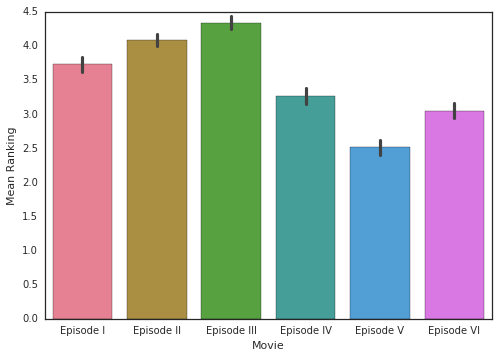

In [48]:
ax = sns.barplot(data=star_wars[star_wars.columns[9:15]]);
ax.set(xlabel='Movie', ylabel='Mean Ranking',
      xticklabels= ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"]);

We can see that older Star Wars movies have a better ranking than the new one. The last one of the first is the most liked. 

#### Finding the most viewed movie

In [23]:
star_wars[star_wars.columns[3:9]].sum()

Seen 1    673
Seen 2    571
Seen 3    550
Seen 4    607
Seen 5    758
Seen 6    738
dtype: int64

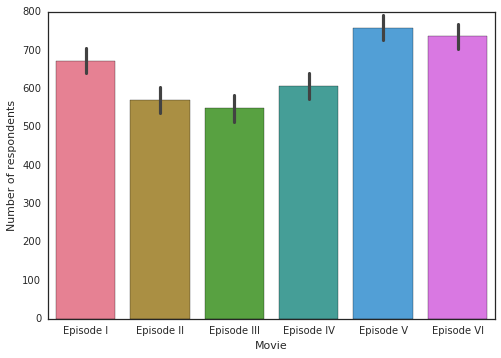

In [49]:
ax = sns.barplot(data=star_wars[star_wars.columns[3:9]], estimator=sum);
ax.set(xlabel='Movie', ylabel='Number of respondents',
             xticklabels= ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"]);

Original movies have been most seen that the new ones. It seems logical as they are older. Nevetherless, it reinforces the idea that the original films are the most popular. 

#### Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how individual segments of the survey population responded. Several columns segment our data into two groups, for instance: "Gender" or "Do you consider yourself to be a fan of the Star Wars film franchise?"

We can split the data frame into subsets to explore the answer of some of the groups separately.

##### Gender study

In [51]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

Let's find the Highest-Ranked Movie by gender

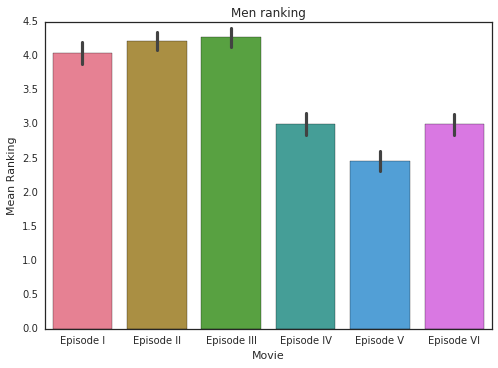

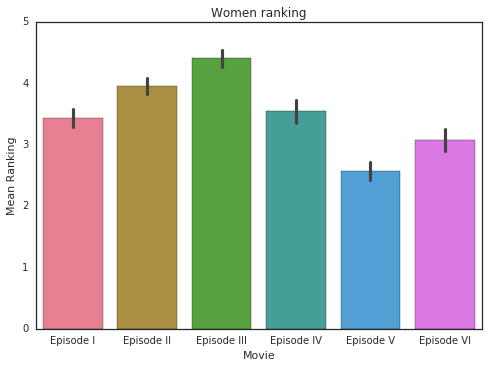

In [61]:
ax1 = sns.barplot(data=males[males.columns[9:15]]);
ax1.set(xlabel='Movie', ylabel='Mean Ranking',
       title= "Men ranking",
      xticklabels= ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"]);

plt.show()
ax2 = sns.barplot(data=females[females.columns[9:15]]);
ax2.set(xlabel='Movie', ylabel='Mean Ranking',
       title= "Women ranking",
      xticklabels= ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"]);
plt.show()

Let's find the most viewed Movie by gender

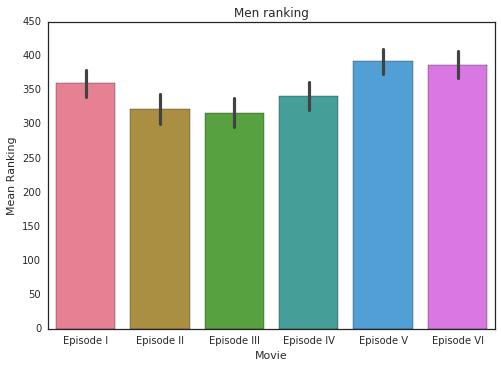

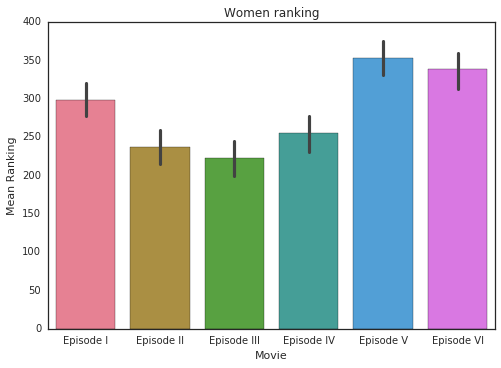

In [63]:
ax1 = sns.barplot(data=males[males.columns[3:9]], estimator=sum);
ax1.set(xlabel='Movie', ylabel='Mean Ranking',
       title= "Men ranking",
      xticklabels= ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"]);

plt.show()
ax2 = sns.barplot(data=females[females.columns[3:9]], estimator=sum);
ax2.set(xlabel='Movie', ylabel='Mean Ranking',
       title= "Women ranking",
      xticklabels= ["Episode I", "Episode II", "Episode III", "Episode IV", "Episode V", "Episode VI"]);
plt.show()

It seems like more men saw the prequel movies, but on average, women seem to like them more. 
The differences between genders are tiny and may be caused by the few answers (less than a thousand) the survey has.

## Conclusion

We have the confirmation than responders (and not the rest of American as FiveThirtyEight wanted ;) ) prefer the old Star Wars movies, and especially *Star Wars: Episode V The Empire Strikes Back* as they were assuming.

We could explore the data further, with those potential steps:
- Explore the results given the difference of the respondents in Education and Location. 
- The survey has some data about the characters of the movie. So, we can rank which character the respondents like or dislike the most. 